# ¿Cuál es el plan telefonico que genera más ingreso?

La empresa de telecomunicaciones Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Se realizará un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Se tiene datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Se analizará el comportamiento de los clientes y determinará qué tarifa de prepago genera más ingresos.

## Introducción
**Propósito del proyecto**

Conocer cuál de los dos planes "Surf" y "Ultimate" le genera más ingresos al operador de telecomunicaciones Megaline


### Objetivos:
1. Realizar los ajustes necesarios a la data al momento de ir explorando los datos.
2. Analizar el comportamiento y el ingreso promedio de los clientes por regiones.
3. Determinar qué tarifa de prepago genera más ingresos, si "Surf" o "Ultimate".

## Inicialización

In [1]:
# Cargando todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy import stats
from scipy import stats as st

## Cargando los datos

In [2]:
# Cargando los archivos de datos en diferentes DataFrames
calls_data = pd.read_csv('/datasets/megaline_calls.csv')
internet_data = pd.read_csv('/datasets/megaline_internet.csv')
messages_data = pd.read_csv('/datasets/megaline_messages.csv')
plans_data = pd.read_csv('/datasets/megaline_plans.csv')
users_data = pd.read_csv('/datasets/megaline_users.csv')

## Explorando los datos

### Planes

In [3]:
plans_data.shape

(2, 8)

In [4]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
plans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
plans_data.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [6]:
plans_data.describe(exclude=['int', 'float'])

,plan_name
count,2
unique,2
top,surf
freq,1


In [7]:
# Imprime una muestra de los datos para los planes
plans_data.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El DataFrame **plans_data** tiene dos filas y nueve columnas, no aplica corregir el tipo de datos, no hay valores ausentes.

### Usuarios

In [8]:
users_data.shape

(500, 8)

In [9]:
# Imprimiendo la información general/resumen sobre el DataFrame de los usuarios
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
users_data.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [11]:
users_data.describe(exclude=['int', 'float'])

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Jasper,Thompson,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,2018-12-18
freq,3,3,80,5,339,3


In [12]:
# Imprimiendo una muestra de los datos para los usuarios
users_data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [13]:
# Inspeccionando las fechas únicas en que el usuario dejó de usar el servicio
users_data["churn_date"].unique()

array([nan, '2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30',
       '2018-10-07', '2018-12-31', '2018-11-24', '2018-11-11',
       '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29',
       '2018-12-22', '2018-11-30', '2018-10-13', '2018-07-31',
       '2018-12-15', '2018-12-19', '2018-10-03', '2018-10-22',
       '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21',
       '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18',
       '2018-09-18'], dtype=object)

In [14]:
# Viendo el % de valores nulos en la columna churn_date
(users_data["churn_date"].isna().sum())/len(users_data)

0.932

In [15]:
users_data["churn_date"].value_counts().sort_values(ascending=False)

2018-12-18    3
2018-12-31    2
2018-11-14    2
2018-12-19    2
2018-08-16    1
2018-11-18    1
2018-11-30    1
2018-11-21    1
2018-09-17    1
2018-09-07    1
2018-07-31    1
2018-12-22    1
2018-11-11    1
2018-11-24    1
2018-11-16    1
2018-11-29    1
2018-10-22    1
2018-10-13    1
2018-08-19    1
2018-12-10    1
2018-12-12    1
2018-10-07    1
2018-12-27    1
2018-12-30    1
2018-10-03    1
2018-12-15    1
2018-09-18    1
2018-12-26    1
2018-09-01    1
Name: churn_date, dtype: int64

El DataFrame **users_data** tiene 500 filas y ocho columnas, hay un 93% de valores ausentes en la columna "*churn_date*"; más adelante indicaremos que se hará con dichos valores. En la columna "*reg_date*" y "*churn_date*", se cambiará el tipo de datos de "*object*" a "*datetime64[ns]*".

### Llamadas

In [16]:
calls_data.shape

(137735, 4)

In [17]:
# Imprimiendo la información/resumen general sobre el DataFrame de las llamadas
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
calls_data.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [19]:
calls_data.describe(exclude=['int', 'float'])

,id,call_date
count,137735,137735
unique,137735,351
top,1276_132,2018-12-27
freq,1,1091


In [20]:
# Imprimiendo una muestra de datos para llamadas
calls_data.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


El DataFrame **calls_data** tiene 137.735 filas y cinco columnas, no hay valores ausentes en el DataFrame. En la columna "*call_date*", se cambiará el tipo de datos de "*object*" a "*datetime64[ns]*".

### Mensajes

In [21]:
messages_data.shape

(76051, 3)

In [22]:
# Imprimiendo la información/resumen general sobre el DataFrame de los mensajes
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
messages_data.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [24]:
messages_data.describe(exclude=['int', 'float'])

,id,message_date
count,76051,76051
unique,76051,351
top,1294_111,2018-12-28
freq,1,702


In [25]:
# Imprimiendo una muestra de datos para los mensajes
messages_data.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


El DataFrame **messages_data** tiene 76.051 filas y cuatro columnas, no hay valores ausentes en el DataFrame. En la columna "*message_date*", se cambiará el tipo de datos de "*object*" a "*datetime64[ns]*". 

### Internet

In [26]:
internet_data.shape

(104825, 4)

In [27]:
# Imprimiendo la información/resumen general sobre el DataFrame de los mensajes
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
internet_data.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [29]:
internet_data.describe(exclude=['int', 'float'])

,id,session_date
count,104825,104825
unique,104825,351
top,1276_132,2018-12-24
freq,1,851


In [30]:
# Imprimiendo una muestra de datos para el tráfico de internet
internet_data.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


 El DataFrame **internet_data** tiene 104.825 filas y seis columnas, no hay valores ausentes en el DataFrame. En la columna "*session_date*", se cambiará el tipo de datos de "*object*" a "*datetime64[ns]*". 

## Corregiendo los datos

**Mejorando los tipos de datos**

Cambiando el **Dtype** de las columnas: *call_date*, *session_date*, *message_date*, *reg_date* y *churn_date* a **datetime64**

In [31]:
datasets = {
    "calls": calls_data,
    "internet": internet_data,
    "messages": messages_data,
    "users": users_data,
}

In [32]:
date_cols = {
    "calls": ["call_date"],
    "internet": ["session_date"],
    "messages": ["message_date"],
    "users": ["reg_date", "churn_date"],
}

for df_name, col_names in date_cols.items():
  for col in col_names:
    datasets[df_name][col] = pd.to_datetime(datasets[df_name][col])

In [33]:
for df_name, df in datasets.items():
  print(f"Dataset: {df_name}")
  print(df.dtypes)
  print()

Dataset: calls
id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

Dataset: internet
id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

Dataset: messages
id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

Dataset: users
user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object



## Enriqueciendo los datos

### Llamadas

In [34]:
# calls
calls_data.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Agregamos la columna "*month*" extrayendo el valor de la columa "*call_date*" y redondeamos los minutos de la duración de la llamada.

In [35]:
# minutos y número de llamadas al mes por usuario
calls_data["month"] = calls_data["call_date"].dt.month
calls_data["duration"] = np.ceil(calls_data["duration"])

calls_by_month = (
    calls_data
    .groupby(["user_id", "month"])["duration"]
    .agg(["sum", "count"])
    .rename(columns={"sum": "monthly_minutes", "count": "number_of_calls"})
    .reset_index()
)

calls_by_month.head()

,user_id,month,monthly_minutes,number_of_calls
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64


In [36]:
#Verificando user_id únicos 
len(users_data) == len(users_data["user_id"].unique())

True

### Internet

In [37]:
#internet
internet_data.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Agregamos la columna "*month*" extrayendo el valor de la columa "*session_date*", realizamos la conversión de mg a GB en la columna "*mb_used*" y redondeamos los GB por mes.

In [38]:
# GB al mes por usuario
internet_data["month"] = internet_data["session_date"].dt.month

# Conversión de mb a GB
internet_data["GB_used"] = internet_data["mb_used"] / 1024

internet_by_month = (
    internet_data
    .groupby(["user_id", "month"])["GB_used"]
    .agg("sum")
    .reset_index()
)

# Redondeando los GB por mes
def monthly_GB(GB_used):
    if GB_used > 1:
        return round(GB_used)
    else:
        return GB_used

internet_by_month["monthly_GB"] = np.ceil(internet_by_month["GB_used"])

internet_by_month.head()

,user_id,month,GB_used,monthly_GB
0,1000,12,1.856904,2.0
1,1001,8,6.756982,7.0
2,1001,9,13.002754,14.0
3,1001,10,21.807119,22.0
4,1001,11,18.070605,19.0


In [39]:
#Verificando user_id únicos 
len(users_data) == len(users_data["user_id"].unique())

True

### Mensajes

In [40]:
#mensajes
messages_data.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Agregamos la columna "*month*" extrayendo el valor de la columa "*message_date*".

In [41]:
# msj al mes por usuario
messages_data["month"] = messages_data["message_date"].dt.month

messages_by_month = (
    messages_data
    .groupby(["user_id", "month"])["id"]
    .agg("count")
    .reset_index()
    .rename(columns={"id": "monthly_messages"})
)

messages_by_month.head()

,user_id,month,monthly_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [42]:
#Verificando user_id únicos 
len(users_data) == len(users_data["user_id"].unique())

True

## Estudiando las condiciones del plan

In [43]:
# Imprimiendo las condiciones del plan
plans_data.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [44]:
# Conversión de mb a GB
plans_data["GB_per_month_included"] = plans_data["mb_per_month_included"] / 1024

In [45]:
plans_data["GB_per_month_included"]

0    15.0
1    30.0
Name: GB_per_month_included, dtype: float64

## Agregando datos por usuario

Acciones realizadas:
    
- Combinación de DataFrame´s para crear "*monthly_income_by_user*",
- Relleno de valores ausentes "*monthly_income_by_user*",
- Calculo de minutos, GB y mensajes extras por mes,
- Calculo de ingresos por minutos, GB y mensajes extras por mes,
- Calculo de ingreso mensual por usuario.

In [46]:
#Combinando los DataFrames 
monthly_income_by_user = (
 calls_by_month
 .merge(messages_by_month, on=["user_id", "month"], how="outer")
 .merge(internet_by_month, on=["user_id", "month"], how="outer")
 .merge(users_data[["user_id", "plan", "city"]], on="user_id", how="inner")
 .rename(columns={"plan": "plan_name"})
 .merge(plans_data, on="plan_name")
)

#Rellenando los valores ausentes con valor cero
monthly_income_by_user.fillna(0, inplace=True)

#Calculando minutos extras
monthly_income_by_user["extra_minutes"] = monthly_income_by_user["monthly_minutes"] - monthly_income_by_user["minutes_included"]
monthly_income_by_user.loc[monthly_income_by_user["extra_minutes"] < 0, "extra_minutes"] = 0

#Calculando GB extras
monthly_income_by_user["extra_GB"] = monthly_income_by_user["monthly_GB"] - monthly_income_by_user["GB_per_month_included"]
monthly_income_by_user.loc[monthly_income_by_user["extra_GB"] < 0, "extra_GB"] = 0

#Calculando mensajes extras
monthly_income_by_user["extra_messages"] = monthly_income_by_user["monthly_messages"] - monthly_income_by_user["messages_included"]
monthly_income_by_user.loc[monthly_income_by_user["extra_messages"] < 0, "extra_messages"] = 0

#Calculando ingresos por minutos extras
monthly_income_by_user["extra_minutes_income"] = monthly_income_by_user["extra_minutes"] * monthly_income_by_user["usd_per_minute"]

#Calculando ingresos por GB extras
monthly_income_by_user["extra_GB_income"] = monthly_income_by_user["extra_GB"] * monthly_income_by_user["usd_per_gb"]

#Calculando ingresos por mensajes extras
monthly_income_by_user["extra_messages_income"] = monthly_income_by_user["extra_messages"] * monthly_income_by_user["usd_per_message"]

#Calculando ingresos por usuario al mes
monthly_income_by_user["monthly_income"] = \
  monthly_income_by_user["usd_monthly_pay"] + \
  monthly_income_by_user["extra_minutes_income"] + \
  monthly_income_by_user["extra_GB_income"] + \
  monthly_income_by_user["extra_messages_income"]

In [47]:
# Imprimimiendo una muestra del nuevo DataFrame al aplicarle el método merge
monthly_income_by_user.sort_values("user_id").head()

,user_id,month,monthly_minutes,number_of_calls,monthly_messages,GB_used,monthly_GB,plan_name,city,messages_included,...,usd_per_message,usd_per_minute,GB_per_month_included,extra_minutes,extra_GB,extra_messages,extra_minutes_income,extra_GB_income,extra_messages_income,monthly_income
0,1000,12,124.0,16.0,11.0,1.856904,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,...,0.01,0.01,30.0,0.0,0.0,0.0,0.0,0.0,0.00,70.00
723,1001,11,426.0,64.0,36.0,18.070605,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,0.03,0.03,15.0,0.0,4.0,0.0,0.0,40.0,0.00,60.00
724,1001,12,412.0,56.0,44.0,18.915215,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,0.03,0.03,15.0,0.0,4.0,0.0,0.0,40.0,0.00,60.00
722,1001,10,393.0,65.0,53.0,21.807119,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,0.03,0.03,15.0,0.0,7.0,3.0,0.0,70.0,0.09,90.09
720,1001,8,182.0,27.0,30.0,6.756982,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,0.03,0.03,15.0,0.0,0.0,0.0,0.0,0.0,0.00,20.00


## Estudiando el comportamiento del usuario

Surf tiene en promedio de minutos más altos

In [48]:
#Calculando media, varianza y desviación estandar
statistics = (
  monthly_income_by_user
 .groupby("plan_name")
 .agg({"monthly_minutes": ["mean", np.var, "std"],
       "monthly_messages": ["mean", np.var, "std"],
       "monthly_GB": ["mean", np.var, "std"],
       "monthly_income": ["mean", np.var, "std"]})
)
statistics

monthly_minutes                           monthly_messages  \
                     mean           var         std             mean   
plan_name                                                              
surf           428.749523  54968.279461  234.453150        31.159568   
ultimate       430.450000  57844.464812  240.508762        37.551389   

                                  monthly_GB                      \
                   var        std       mean       var       std   
plan_name                                                          
surf       1126.724522  33.566717  16.670693  61.58360  7.847522   
ultimate   1208.756744  34.767179  17.306944  58.83055  7.670108   

          monthly_income                          
                    mean          var        std  
plan_name                                         
surf           60.706408  3067.835152  55.388042  
ultimate       72.313889   129.848486  11.395108

In [49]:
monthly_income_by_user

,user_id,month,monthly_minutes,number_of_calls,monthly_messages,GB_used,monthly_GB,plan_name,city,messages_included,...,usd_per_message,usd_per_minute,GB_per_month_included,extra_minutes,extra_GB,extra_messages,extra_minutes_income,extra_GB_income,extra_messages_income,monthly_income
0,1000,12,124.0,16.0,11.0,1.856904,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,...,0.01,0.01,30.0,0.0,0.0,0.0,0.0,0.0,0.00,70.00
1,1006,11,10.0,2.0,15.0,2.019893,3.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,0.01,0.01,30.0,0.0,0.0,0.0,0.0,0.0,0.00,70.00
2,1006,12,59.0,9.0,139.0,31.366035,32.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",1000,...,0.01,0.01,30.0,0.0,2.0,0.0,0.0,14.0,0.00,84.00
3,1008,10,476.0,71.0,21.0,16.706045,17.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,...,0.01,0.01,30.0,0.0,0.0,0.0,0.0,0.0,0.00,70.00
4,1008,11,446.0,63.0,37.0,23.121797,24.0,ultimate,"Orlando-Kissimmee-Sanford, FL MSA",1000,...,0.01,0.01,30.0,0.0,0.0,0.0,0.0,0.0,0.00,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,11,0.0,0.0,62.0,41.861426,42.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,...,0.03,0.03,15.0,0.0,27.0,12.0,0.0,270.0,0.36,290.36
2289,1194,12,0.0,0.0,56.0,30.359854,31.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,...,0.03,0.03,15.0,0.0,16.0,6.0,0.0,160.0,0.18,180.18
2290,1349,10,0.0,0.0,76.0,12.786670,13.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,...,0.03,0.03,15.0,0.0,0.0,26.0,0.0,0.0,0.78,20.78
2291,1349,11,0.0,0.0,72.0,16.726816,17.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",50,...,0.03,0.03,15.0,0.0,2.0,22.0,0.0,20.0,0.66,40.66


In [50]:
# Diferencia de medias entre un surf y ultimate por monthly_minutes
2/430 * 100

0.46511627906976744

In [51]:
# Diferencia de medias entre un surf y ultimate por monthly_messages
7/38 * 100

18.421052631578945

In [52]:
# Diferencia de medias entre un surf y ultimate por monthly_GB
1/17 * 100

5.88235294117647

In [53]:
# Diferencia de medias entre un surf y ultimate por monthly_income
11/72 * 100

15.277777777777779

In [54]:
#Creando una tabla para cada plan, Surf y Ultimate.
surf_monthly_income = monthly_income_by_user.loc[monthly_income_by_user["plan_name"] == "surf"]
ultimate_monthly_income = monthly_income_by_user.loc[monthly_income_by_user["plan_name"] == "ultimate"]

### Llamadas

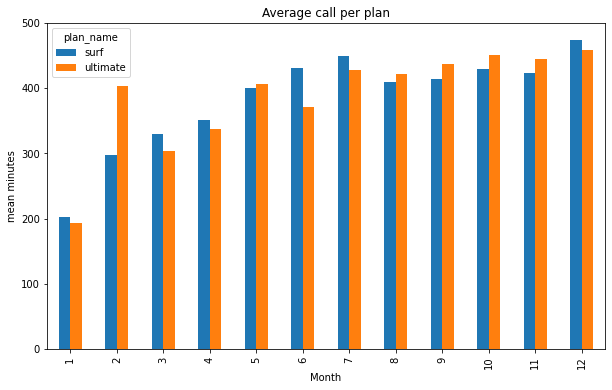

In [55]:
# Comparando la duración promedio de llamadas por cada plan por cada mes.
mean_call_plan = monthly_income_by_user.pivot_table(index="month", columns="plan_name", values="monthly_minutes")

mean_call_plan.plot(kind="bar", title= f"Average call per plan", figsize=(10, 6))
plt.ylabel(f"mean minutes")
plt.xlabel(f"Month")
plt.ylim(0,500)
plt.show()

En el **histograma** aplicamos "*density= True*" para normalizar el tamaño de ambas poblaciones.

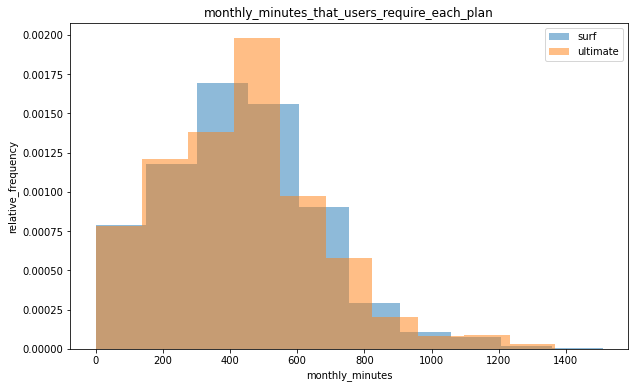

In [56]:
# Comparando el número de minutos que los usuarios de cada plan requieren cada mes.
surf_monthly_income["monthly_minutes"].plot(kind="hist", alpha=0.5, label="surf", density=True, figsize=(10, 6))
ultimate_monthly_income["monthly_minutes"].plot(kind="hist", alpha=0.5, label="ultimate", density=True, figsize=(10, 6))
plt.legend()

plt.title(f"monthly_minutes_that_users_require_each_plan")
plt.ylabel(f"relative_frequency")
plt.xlabel(f"monthly_minutes")

plt.show()

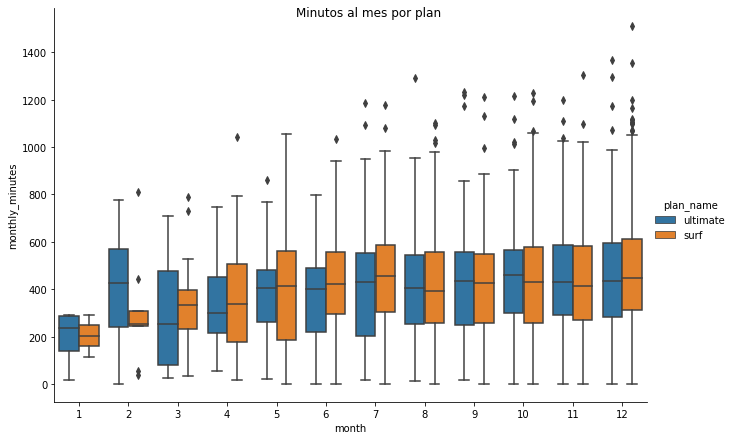

In [57]:
# Visualizando la distribución de la duración mensual de llamadas.
calls= sns.catplot(data= monthly_income_by_user, x="month", y="monthly_minutes", hue="plan_name", kind="box", height=6, aspect=1.5)
calls.fig.suptitle('Minutos al mes por plan')
plt.show()

**Conclusiones**

Analizando cómo se comportan los usuarios en cuanto a las llamadas, observamos:

- `La duración promedio de llamadas por cada plan por cada mes`, para ambos planes es muy parecida, solo varia en un 0.5%. Los usuarios con el plan ultimate se mantuvieron con los minutos que trae su plan; sin embargo, es todo lo contratio para los usuarios del plan Surf.
        
    
- `El número de minutos que los usuarios de cada plan requieren cada mes`, los usuarios de ambos planes coninciden en que usaron entre 300 a 550 minutos aprox.


- `Visualizando la distribución de la duración mensual de llamadas`, ambos planes tienen un comportamiento similar entre mayo-diciembre 2018, habiendo diferencia entre los primeros cuatros meses.

### Mensajes

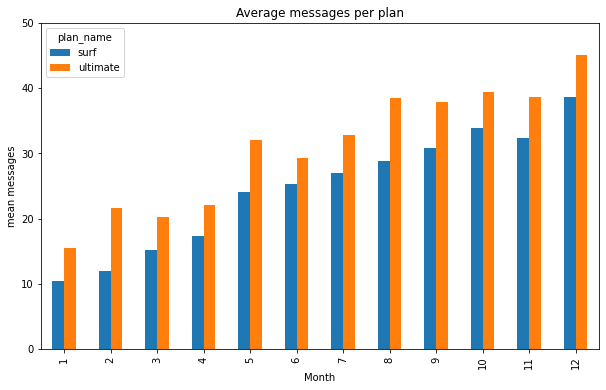

In [58]:
# Comprarando el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mean_messages_plan = monthly_income_by_user.pivot_table(index="month", columns="plan_name", values="monthly_messages")

mean_messages_plan.plot(kind="bar", title= f"Average messages per plan", figsize=(10, 6))
plt.ylabel(f"mean messages")
plt.xlabel(f"Month")
plt.ylim(0,50)
plt.show()

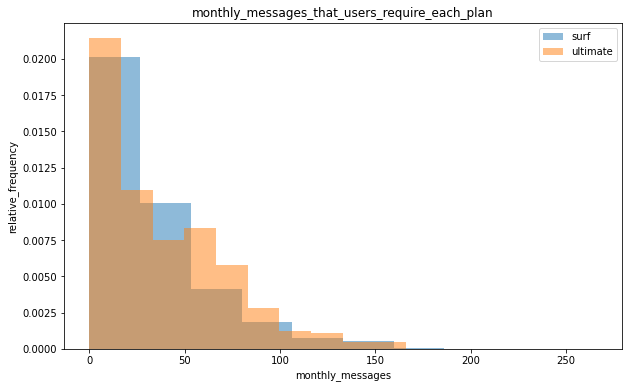

In [59]:
# Comparando el número de mensajes que los usuarios de cada plan requieren cada mes.
surf_monthly_income["monthly_messages"].plot(kind="hist", alpha=0.5, label="surf", density=True, figsize=(10, 6))
ultimate_monthly_income["monthly_messages"].plot(kind="hist", alpha=0.5, label="ultimate", density=True, figsize=(10, 6))
plt.legend()

plt.title(f"monthly_messages_that_users_require_each_plan")
plt.ylabel(f"relative_frequency")
plt.xlabel(f"monthly_messages")

plt.show()

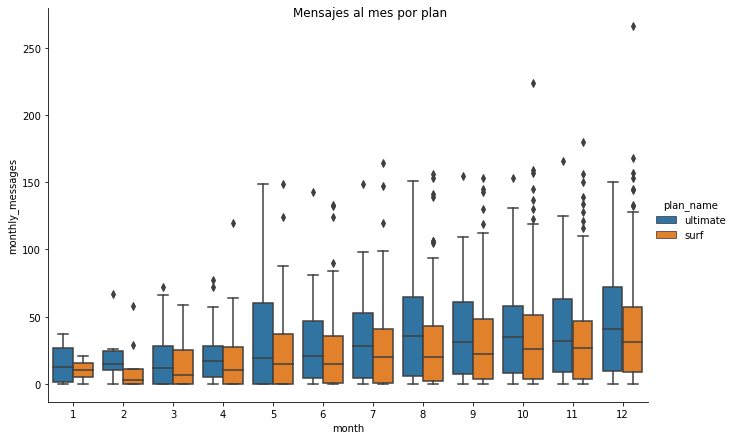

In [60]:
# Visualizando la distribución del consumo mensual de mensajes.
messages= sns.catplot(data= monthly_income_by_user, x="month", y="monthly_messages", hue="plan_name", kind="box", height=6, aspect=1.5)
messages.fig.suptitle('Mensajes al mes por plan')
plt.show()

**Conclusiones**

Analizando cómo se comportan los usuarios en cuanto al envio de mensajes, observamos:

- `La duración promedio de mensajes por cada plan por cada mes`, varia entre ambos planes en en un 18% aprox, siendo el plan ultimate el que consume más mensajes en promedio al mes; sin embargo, los usuarios en promedio no se exceden con el envio de mensajes más allá de lo que trae su plan.
        
    
- `El número de mensajes que los usuarios de cada plan requieren cada mes`, los usuarios de ambos planes coinciden en que consumen entre 0 a 50 mensajes aprox.


- `Visualizando la distribución del consumo mensual de mensajes`, el plan ultimate en promedio consume más mensajes que el plan surf.

### Internet

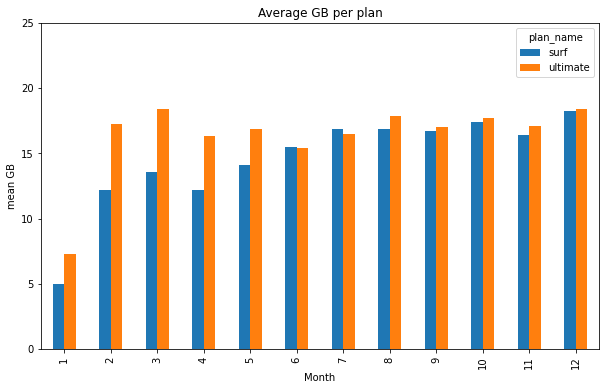

In [61]:
# Comprarando el número de GB que tienden a consumir cada mes los usuarios de cada plan
mean_GB_plan = monthly_income_by_user.pivot_table(index="month", columns="plan_name", values="monthly_GB")

mean_GB_plan.plot(kind="bar", title= f"Average GB per plan", figsize=(10, 6))
plt.ylabel(f"mean GB")
plt.xlabel(f"Month")
plt.ylim(0,25)
plt.show()

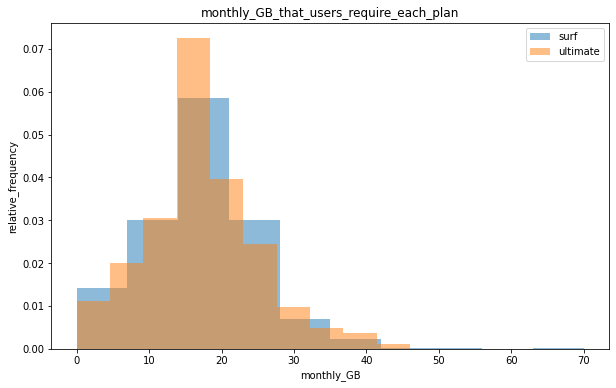

In [62]:
# Comparando el número de GB que los usuarios de cada plan requieren cada mes.
surf_monthly_income["monthly_GB"].plot(kind="hist", alpha=0.5, label="surf", density=True, figsize=(10, 6))
ultimate_monthly_income["monthly_GB"].plot(kind="hist", alpha=0.5, label="ultimate", density=True, figsize=(10, 6))
plt.legend()

plt.title(f"monthly_GB_that_users_require_each_plan")
plt.ylabel(f"relative_frequency")
plt.xlabel(f"monthly_GB")

plt.show()

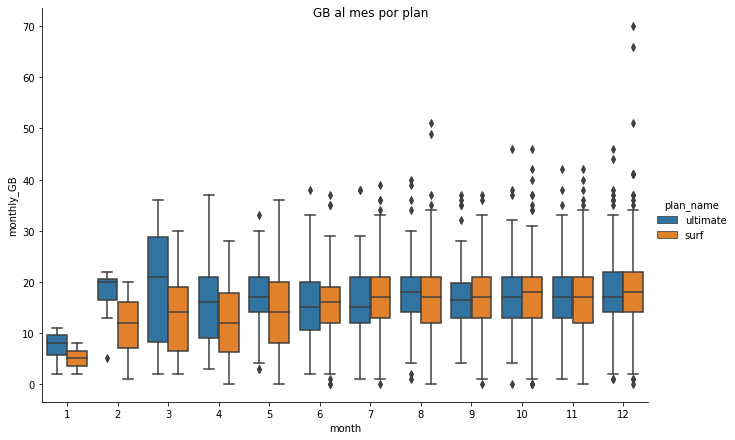

In [63]:
# Visualizando la distribución de la consumo mensual de GB.
calls= sns.catplot(data= monthly_income_by_user, x="month", y="monthly_GB", hue="plan_name", kind="box", height=6, aspect=1.5)
calls.fig.suptitle('GB al mes por plan')
plt.show()

**Conclusiones**

Analizando cómo se comportan los usuarios en cuanto al consumo de GB, observamos:

- `La duración promedio deL consumo de GB por cada plan por cada mes`, varia entre ambos planes en en un 6% aprox, siendo el plan ultimate el que consume más mensajes en promedio al mes; sin embargo, los usuarios del plan Surf consumieron más GB de lo que su plan trae de junio-diciembre 2018.
        
    
- `El consumo de GB que los usuarios de cada plan requieren cada mes`, los usuarios de ambos planes coinciden en que consumen entre 10 a 23 GB aprox.


- `Visualizando la distribución del consumo de GB por mes`, el plan ultimate su promedio de consumo fue mayor durante los primeros cinco meses que el plan surf. El resto de los meses se puede decir que fue parejo.

## Estudiando el ingreso por plan

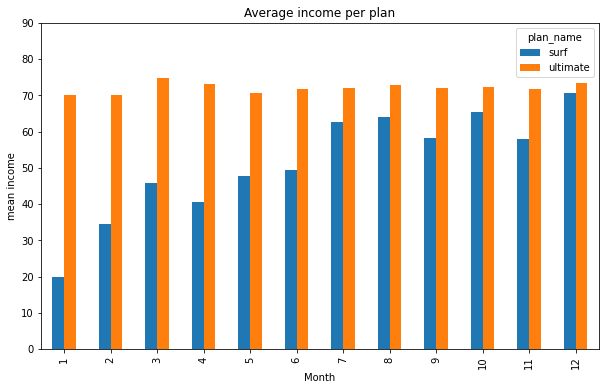

In [64]:
# Comprarando el ingreso por cada mes por los usuarios de cada plan
mean_income_plan = monthly_income_by_user.pivot_table(index="month", columns="plan_name", values="monthly_income")

mean_income_plan.plot(kind="bar", title= f"Average income per plan", figsize=(10, 6))
plt.ylabel(f"mean income")
plt.xlabel(f"Month")
plt.ylim(0,90)
plt.show()

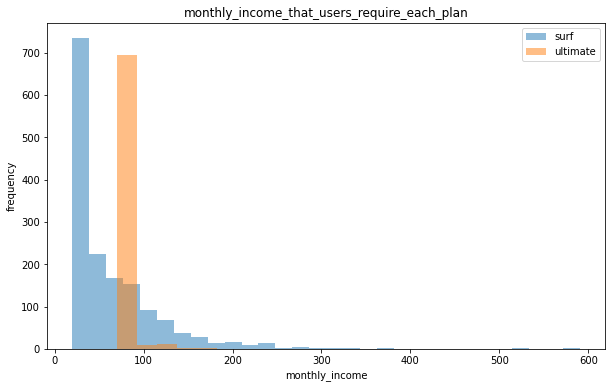

In [65]:
# Comparando el número de ingreso por los usuarios de cada plan al mes.
surf_monthly_income["monthly_income"].plot(kind="hist", alpha=0.5, label="surf", figsize=(10, 6), bins=30)
ultimate_monthly_income["monthly_income"].plot(kind="hist", alpha=0.5, label="ultimate", figsize=(10, 6), bins=5)
plt.legend()

plt.title(f"monthly_income_that_users_require_each_plan")
plt.ylabel(f"frequency")
plt.xlabel(f"monthly_income")

plt.show()

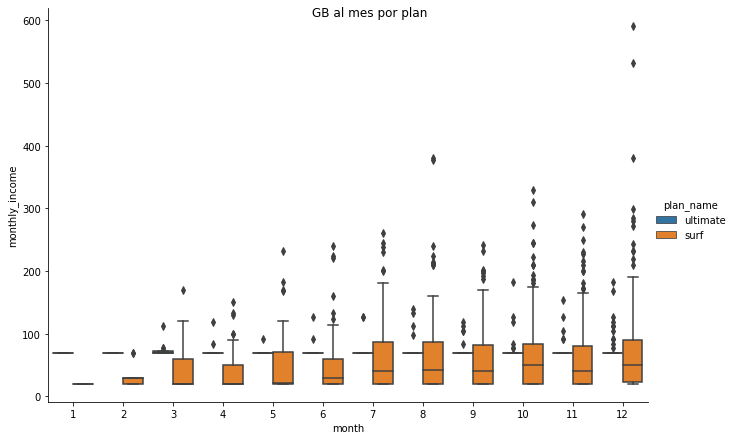

In [66]:
# Visualizando la distribución del ingreso mensual por plan.
calls= sns.catplot(data= monthly_income_by_user, x="month", y="monthly_income", hue="plan_name", kind="box", height=6, aspect=1.5)
calls.fig.suptitle('GB al mes por plan')
plt.show()

 **Conclusiones**

Analizando cómo difiere el ingreso entre los planes, observamos:

- `El ingreso por cada mes por los usuarios de cada plan`, varia entre ambos planes en en un 15% aprox, siendo el plan ultimate el que genera mayores ingresos comparado el plan sur; sin embargo, el plan surf todos los meses genera ingresos extras muy por encima al pago mensual de su plan que son 20 USD, entre 10-50 USD extras, en creciente por mes.
        
    
- `El número de ingreso por los usuarios de cada plan al mes`, el plan surf tiene mayor frecuencia de ingreso que el plan ultimate a pesar que su plan base es menor.


- `Visualizando la distribución del ingreso mensual por plan`, aunque el plan ultimate y más costoso que el plan surf, sus ingresos estan casi a la par, y se evidencia que el plan surf no se adapta a las necesidades del usuario ya que termina pagando mucho más que su plan base.

## Probando las hipótesis estadísticas

### Ingreso promedio por  plan

#### Corroborando si las muestras presentan una distribución normal

In [67]:
stats.shapiro(
    surf_monthly_income["monthly_income"],
)

ShapiroResult(statistic=0.7346445918083191, pvalue=1.5414283107572988e-44)

In [68]:
stats.shapiro(
    ultimate_monthly_income["monthly_income"],
)

ShapiroResult(statistic=0.20936310291290283, pvalue=0.0)

A partir de los resultados obtenidos, ya que ambos pvalue son menor a 0.05, podemos concluir que ninguno de los dos vectores son normales.

#### Definición de hipótesis nula e hipótesis alternativa

- **`H0`**= el ingreso promedio de los usuarios de los planes de llamada Ultimate y Surf son *iguales*.

- **`H1`**= el ingreso promedio de los usuarios de los planes de llamada Ultimate y Surf son *diferentes*.

#### Prueba de hipótesis

In [69]:
# Prueba las hipótesis
alpha= 0.05

statistic, p_value  = st.mannwhitneyu(
    surf_monthly_income["monthly_income"],
    ultimate_monthly_income["monthly_income"]
)

print('statistic: ', statistic)
print()
print('p_value: ', p_value)
print()
print(p_value, "<", alpha)

if p_value < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

statistic:  355086.0

p_value:  1.912179587173433e-48

1.912179587173433e-48 < 0.05
Rechazamos la hipótesis nula


La probabilidad de que statistic ocurra es de 1.912179587173433e-46 % y el ingreso promedio de los usuarios de los planes de llamada Ultimate y Surf son diferentes. Las medias no son iguales.

### Ingreso promedio por  región

#### Corroborando si las muestras presentan una distribución normal

In [70]:
NY_NJ_regions_income = monthly_income_by_user.loc[monthly_income_by_user["city"].str.contains("NY-NJ")]
Rest_regions_income = monthly_income_by_user.loc[~monthly_income_by_user["city"].str.contains("NY-NJ")]

In [71]:
stats.shapiro(
    NY_NJ_regions_income["monthly_income"],
)

ShapiroResult(statistic=0.8283717632293701, pvalue=9.16044367265658e-20)

In [72]:
stats.shapiro(
    Rest_regions_income["monthly_income"],
)

ShapiroResult(statistic=0.7427323460578918, pvalue=0.0)

**Conclusión intermedia**

A partir de los resultados obtenidos, ya que ambos pvalue son menor a 0.05, podemos concluir que ninguno de los dos vectores son normales.

#### Definición de hipótesis nula e hipótesis alternativa

- **`H0`** el ingreso promedio de los usuarios del área NY-NJ y de los usuarios de otras regiones son *iguales*

- **`H1`**= el ingreso promedio de los usuarios del área NY-NJ y de los usuarios de otras regiones son *diferentes*

#### Prueba de hipótesis

In [73]:
# Prueba las hipótesis

alpha= 0.05

statistic, p_value  = st.mannwhitneyu(
    NY_NJ_regions_income["monthly_income"],
    Rest_regions_income["monthly_income"]
)

print('statistic: ', statistic)
print()
print('p_value: ', p_value)
print()
print(p_value, "<", alpha)

if p_value < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

statistic:  327909.5

p_value:  0.003927631468615441

0.003927631468615441 < 0.05
Rechazamos la hipótesis nula


La probabilidad de que statistic ocurra es de 0.39 % y el ingreso promedio de los usuarios del área NY-NJ y de los usuarios de otras regiones son diferentes. Las medias no son iguales.

In [74]:
#Medias de ingresos por región
print('Mean_NY_NJ_regions_income: ', NY_NJ_regions_income["monthly_income"].mean())
print('Mean_Rest_regions_income: ', Rest_regions_income["monthly_income"].mean())

Mean_NY_NJ_regions_income:  59.92135278514589
Mean_Rest_regions_income:  65.2227713987474


## Conclusión general

 - **`1`**.- El plan Surf le genera más ingresos al operador de telecomunicaciones Megaline comparado con el plan Surf ya que se evidencio un ingreso por mes mucho mayor a la base de su plan original (20 USD), de hasta tres veces su valor.
        
    
 - **`2`**.- Los usuarios del plan Surf deberían cambiarse de plan, o ajustarse al paquete  contratado y así no pagar más de lo planificado. Los usuarios del plan Ultimate, a pesar de excederse por poco en el costo de su plan inicial en ciertos meses, se evidencia que hicieron una mejor escongencia de plan con base a sus necesidades.   


 - **`3`**.- Al probar las hipótesis estadísticas tenemos:
     
     **a).- Ingreso promedio por plan**: se rechaza la hipótesis nula, por lo cuál el ingreso promedio de los usuarios de los planes de llamada Ultimate y Surf son diferentes.
     
     **b).- Ingreso promedio por región**: se rechaza la hipótesis nula, por lo cuál el ingreso promedio de los usuarios del área NY-NJ y de los usuarios de otras regiones son diferentes.